# Naive Bayes Modelo

In [1]:
import pandas as pd
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets

# Importacion Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split

In [2]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Entrenamiento aplicando Multinomial

# Entrenamiento con todos los features

In [3]:
mnb_con_todos_los_features = MultinomialNB()
mnb_con_todos_los_features.fit(X_train, y_train)
y_pred = mnb_con_todos_los_features.predict(X_test)

# Metricas

Accuracy: 0.7534162444342085

Precision: 0.49686765857478465

Recall: 0.7389802965671338

F1 Score: 0.6124517374517375

Matriz de confusion: 
[[3638 1285]
 [ 321 1269]]

AUC-ROC: 



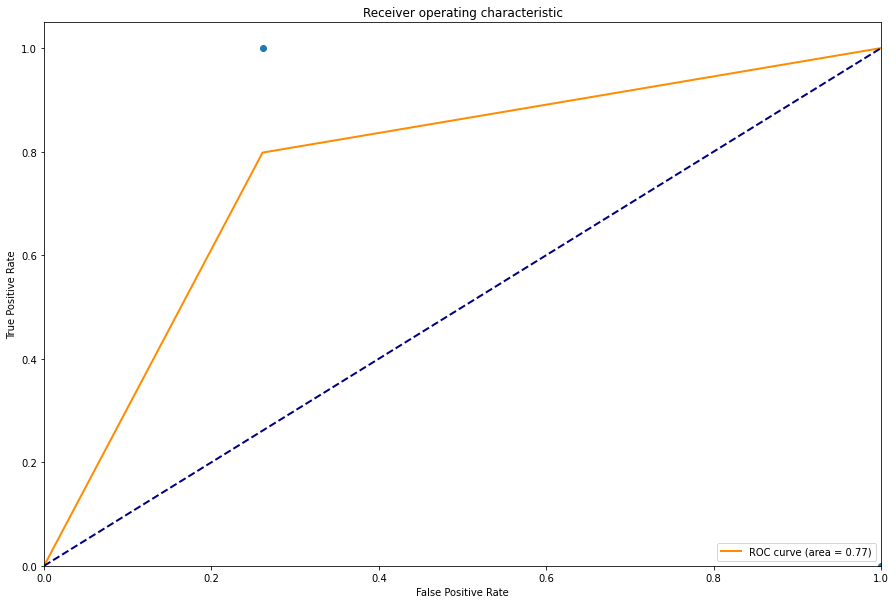

0.768546752057152

In [4]:
m.getMetrics(y_test, y_pred)

# Entrenamiento con seleccion

In [5]:
mnb_con_seleccion = MultinomialNB()
mnb_con_seleccion.fit(X_train, y_train)
y_pred = mnb_con_seleccion.predict(X_test)

# Metricas

Accuracy: 0.7534162444342085

Precision: 0.49686765857478465

Recall: 0.7389802965671338

F1 Score: 0.6124517374517375

Matriz de confusion: 
[[3638 1285]
 [ 321 1269]]

AUC-ROC: 



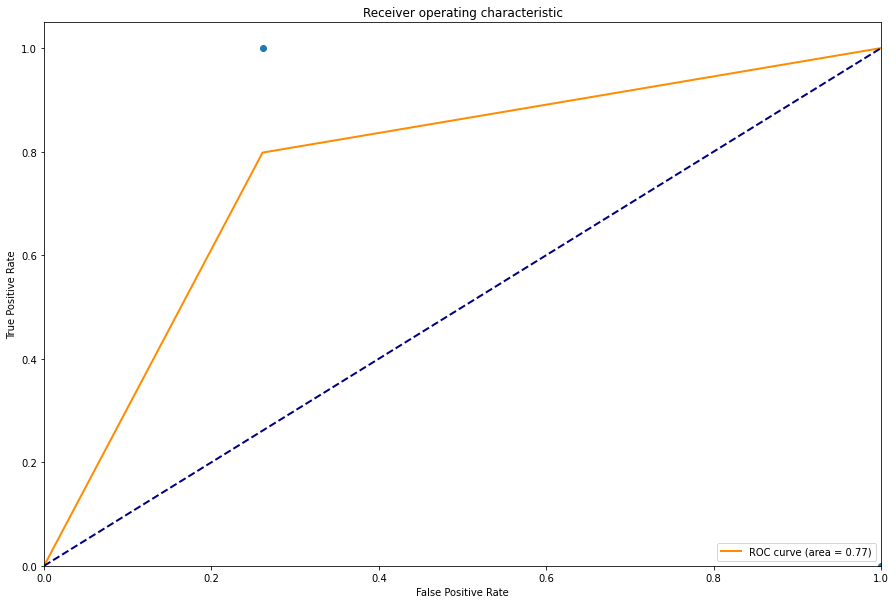

0.768546752057152

In [7]:
m.getMetrics(y_test, y_pred)

# Prediccion

In [8]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataValidation()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfObjetivo)

predicciones = mnb_con_todos_los_features.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 1, 1, ..., 1, 1, 1])

In [9]:
fp.exportPredictions(fp.formatPredictions(predicciones), "pd_predictions_naive_bayes")